In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Cleaned_data.xlsx")

In [3]:
df

,country_name,country_code,year,female_population,male_population,total_population
0,Afghanistan,AFG,2000,9727541,9815442,19542982
1,Afghanistan,AFG,2001,9793166,9895467,19688632
2,Afghanistan,AFG,2002,10438055,10562202,21000256
3,Afghanistan,AFG,2003,11247647,11397483,22645130
4,Afghanistan,AFG,2004,11690825,11862726,23553551
...,...,...,...,...,...,...
5203,Zimbabwe,ZWE,2019,8122618,7231989,15354608
5204,Zimbabwe,ZWE,2020,8284447,7385220,15669666
5205,Zimbabwe,ZWE,2021,8449834,7543690,15993524
5206,Zimbabwe,ZWE,2022,8614935,7705601,16320537


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

country_name         0
country_code         0
year                 0
female_population    0
male_population      0
total_population     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country_name       5208 non-null   object
 1   country_code       5208 non-null   object
 2   year               5208 non-null   int64 
 3   female_population  5208 non-null   int64 
 4   male_population    5208 non-null   int64 
 5   total_population   5208 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 244.3+ KB


In [7]:
df.describe()

,year,female_population,male_population,total_population
count,5208.000000,5.208000e+03,5.208000e+03,5.208000e+03
mean,2011.500000,1.620951e+07,1.640439e+07,3.261391e+07
std,6.922851,6.330657e+07,6.653533e+07,1.298285e+08
min,2000.000000,4.822000e+03,4.769000e+03,9.609000e+03
25%,2005.750000,3.400922e+05,3.708010e+05,7.181055e+05
50%,2011.500000,2.817744e+06,2.883434e+06,5.700332e+06
75%,2017.250000,1.048261e+07,1.031960e+07,2.091270e+07
max,2023.000000,6.917761e+08,7.368515e+08,1.428628e+09


In [8]:
df['country_name'].nunique()

217

In [9]:
df.columns

Index(['country_name', 'country_code', 'year', 'female_population',
       'male_population', 'total_population'],
      dtype='object')

In [10]:
print(df['year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [11]:
top_10_countries_total = df.groupby('country_name')['total_population'].sum().nlargest(10).index
top_10_countries_total

Index(['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan',
       'Nigeria', 'Bangladesh', 'Russian Federation', 'Japan'],
      dtype='object', name='country_name')

In [12]:
# Filter the DataFrame to include only the top 10 countries
filtered_df = df[df['country_name'].isin(top_10_countries_total)]

# Filter data for the year 2023
data_2023 = filtered_df[filtered_df['year'] == 2023]

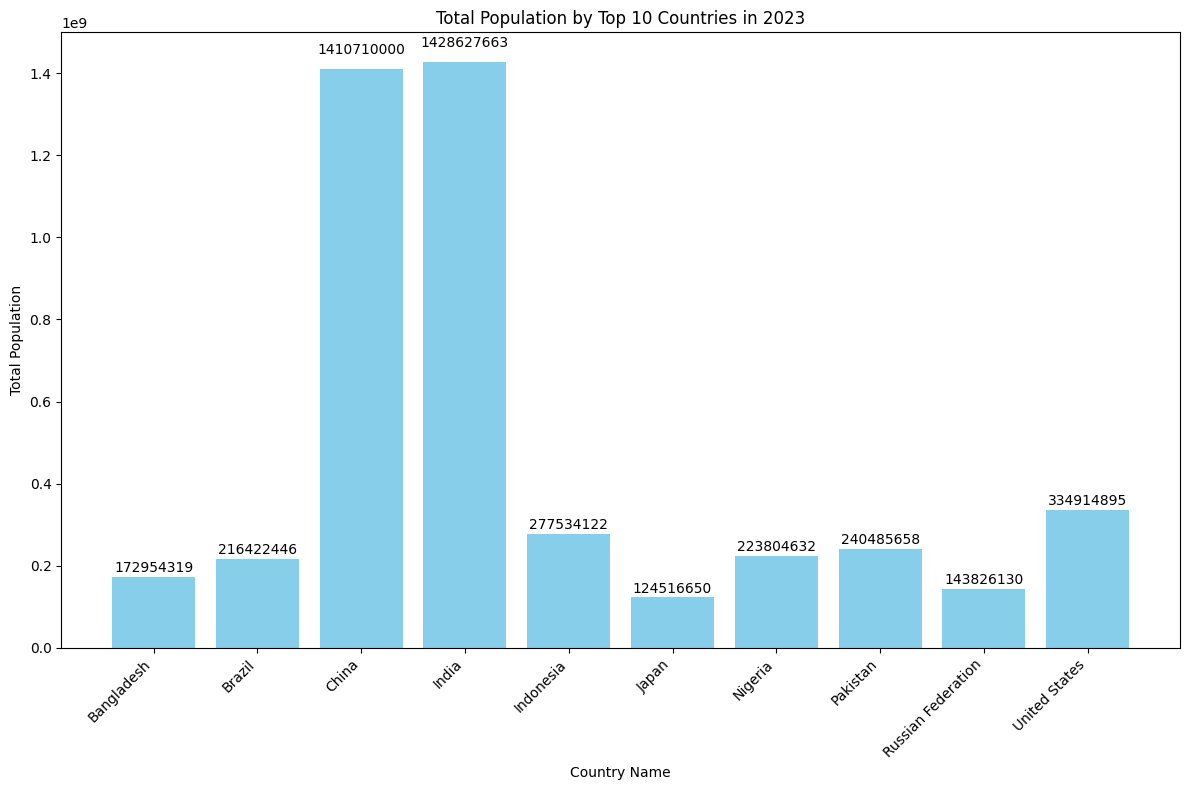

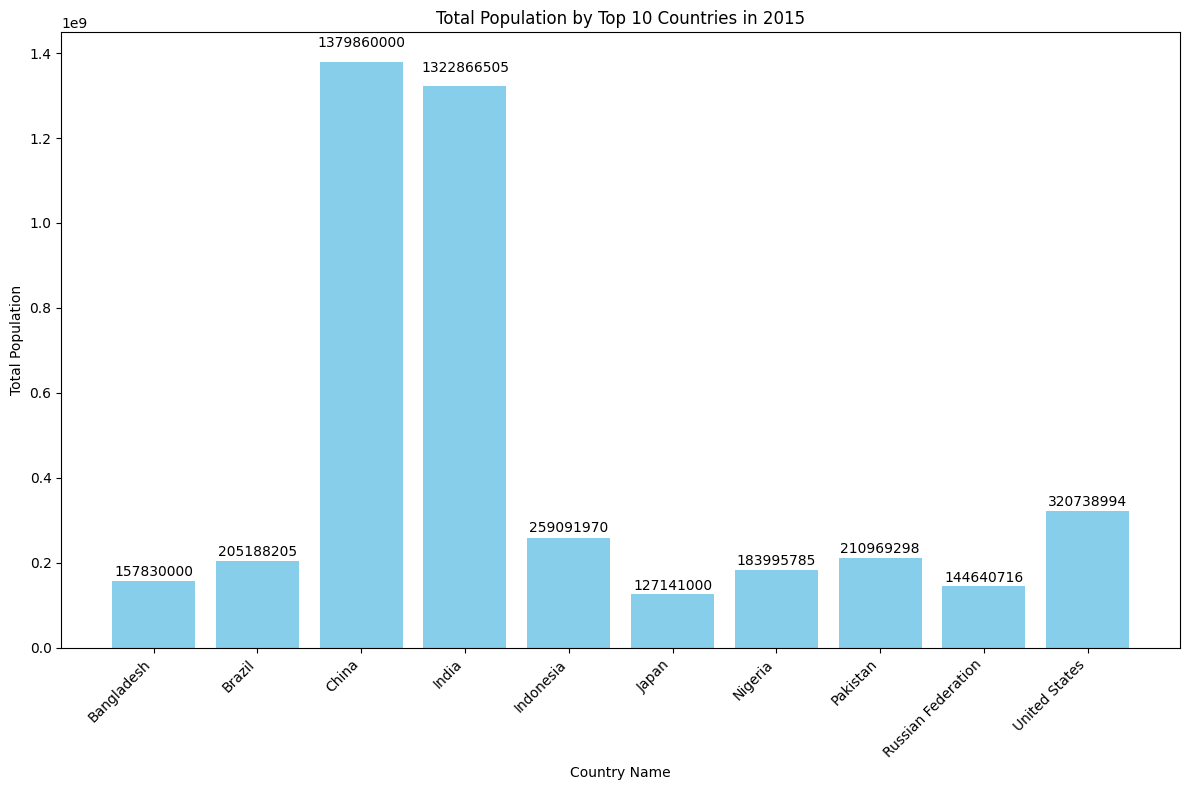

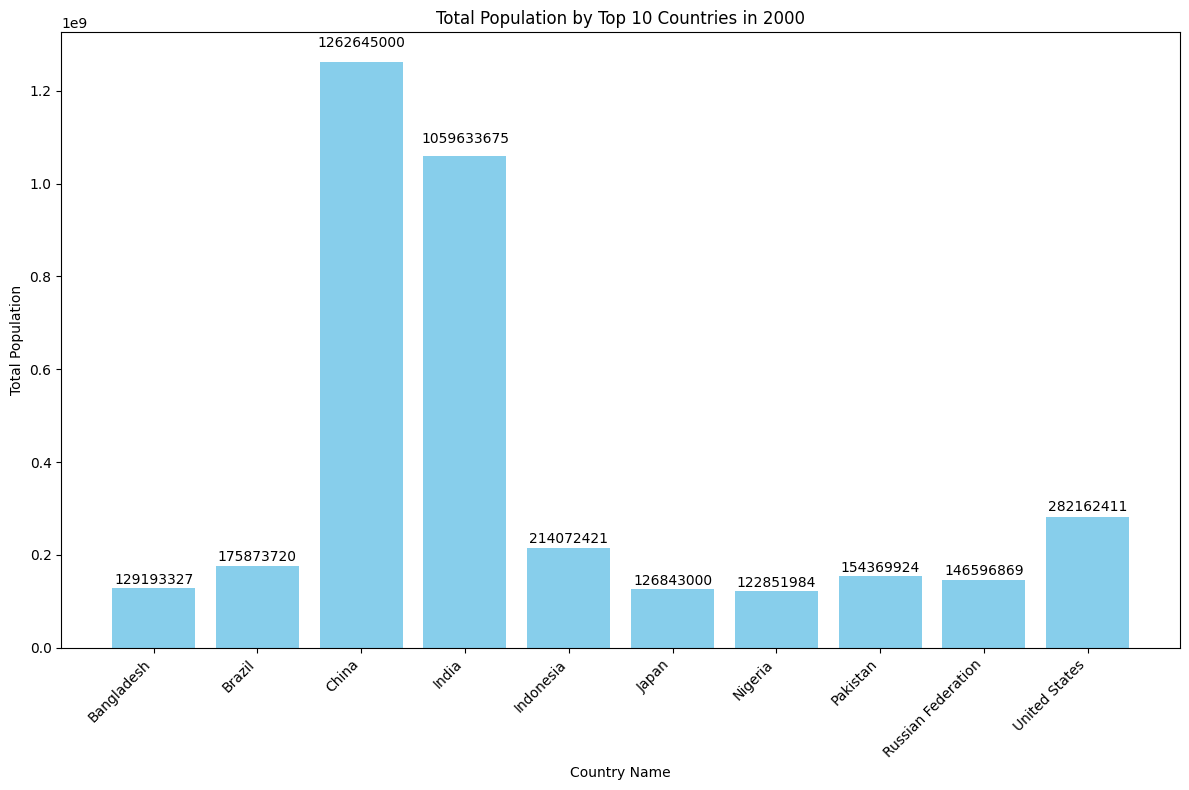

In [13]:
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(data_2023['country_name'], data_2023['total_population'], color='skyblue')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')
    
plt.title('Total Population by Top 10 Countries in 2023')
plt.xlabel('Country Name')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


data_2015 = filtered_df[filtered_df['year'] == 2015]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(data_2015['country_name'], data_2015['total_population'], color='skyblue')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')
    
plt.title('Total Population by Top 10 Countries in 2015')
plt.xlabel('Country Name')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


data_2000 = filtered_df[filtered_df['year'] == 2000]

# Step 3: Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(data_2000['country_name'], data_2000['total_population'], color='skyblue')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')
    
plt.title('Total Population by Top 10 Countries in 2000')
plt.xlabel('Country Name')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [14]:
bottom_10_countries_total = df.groupby('country_name')['total_population'].sum().nsmallest(10).index
bottom_10_countries_total

Index(['Tuvalu', 'Nauru', 'Palau', 'British Virgin Islands', 'Gibraltar',
       'San Marino', 'Turks and Caicos Islands', 'St. Martin (French part)',
       'Monaco', 'Sint Maarten (Dutch part)'],
      dtype='object', name='country_name')

In [15]:
# Filter the DataFrame to include only the bottom 10 countries
bottom_df = df[df['country_name'].isin(bottom_10_countries_total)]

# Filter data for the year 2023
data_2023 = bottom_df[bottom_df['year'] == 2023]

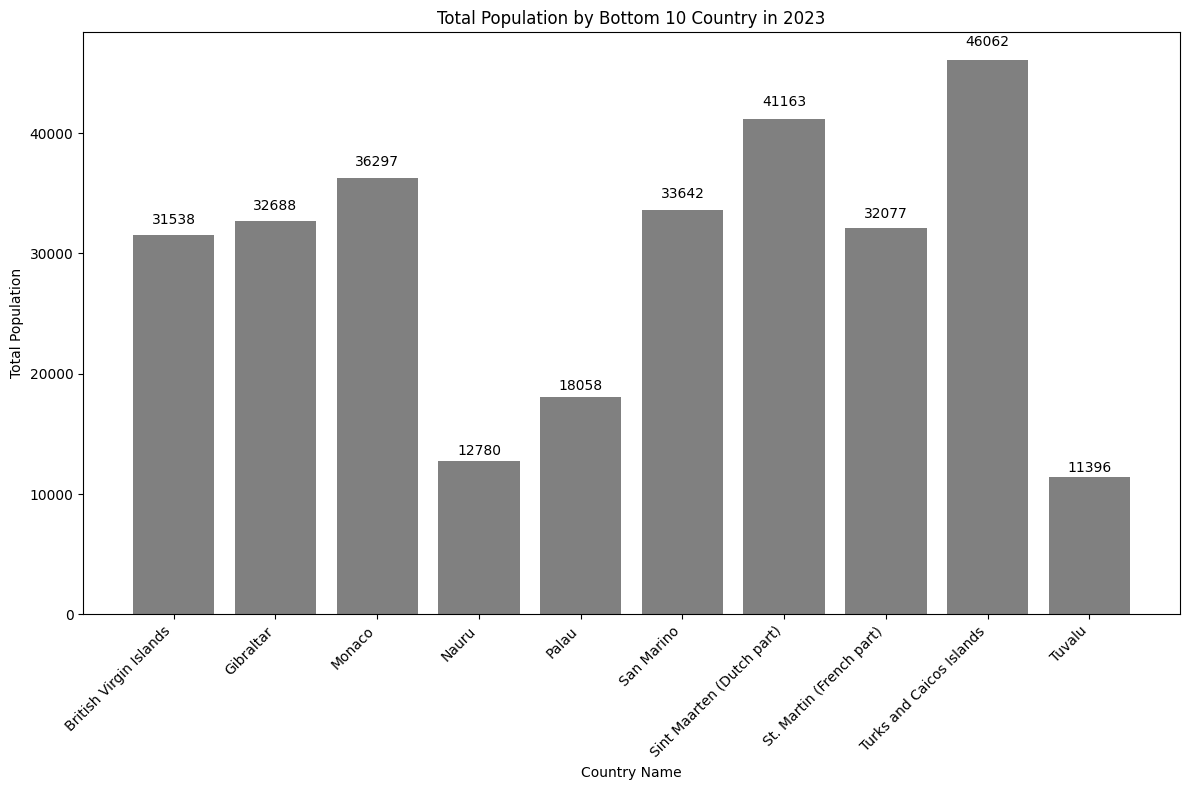

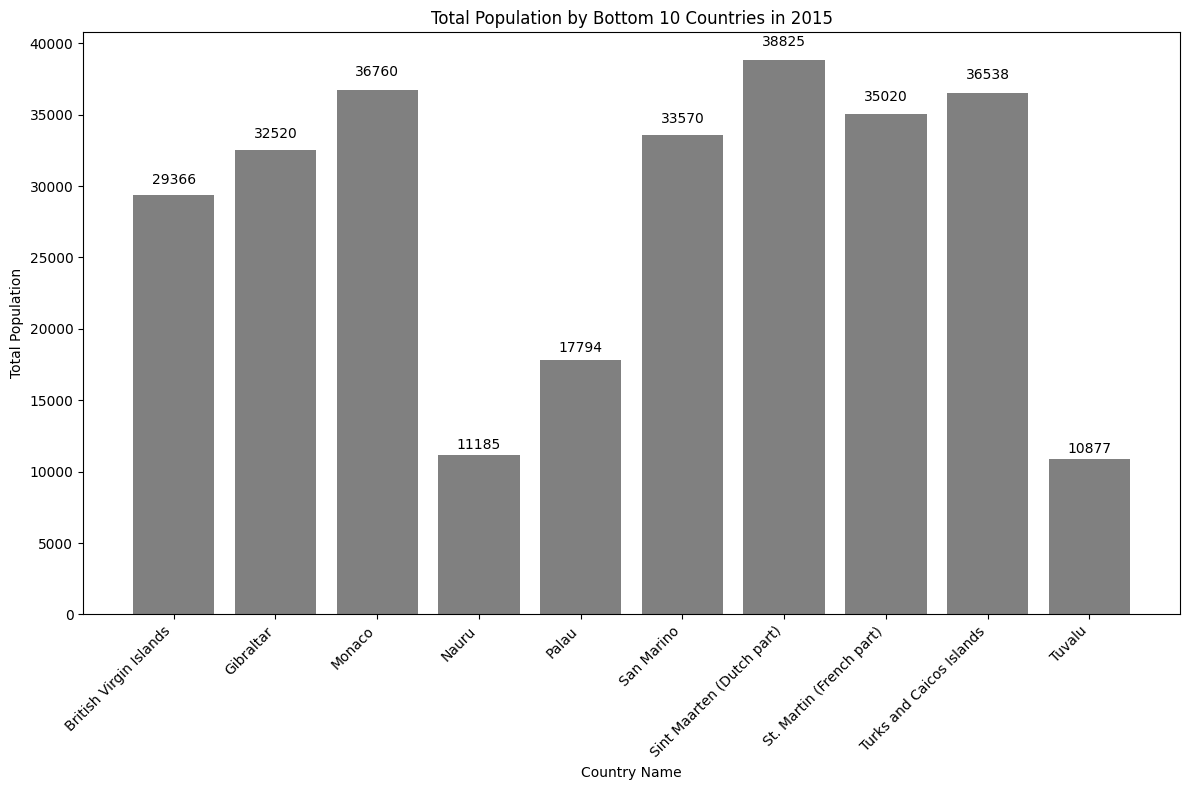

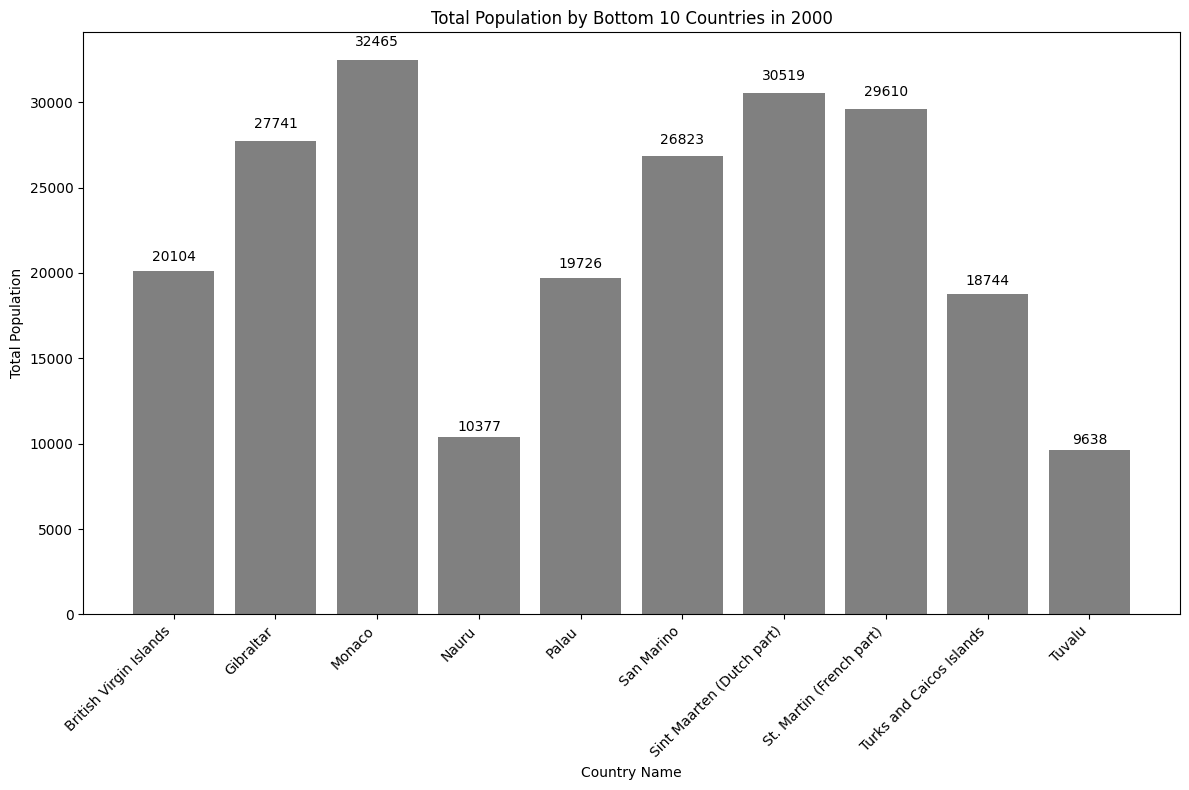

In [16]:
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(data_2023['country_name'], data_2023['total_population'], color='grey')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')
    
plt.title('Total Population by Bottom 10 Country in 2023')
plt.xlabel('Country Name')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

data_2015 = bottom_df[bottom_df['year'] == 2015]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(data_2015['country_name'], data_2015['total_population'], color='grey')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')
    
plt.title('Total Population by Bottom 10 Countries in 2015')
plt.xlabel('Country Name')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

data_2000 = bottom_df[bottom_df['year'] == 2000]

# Step 3: Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(data_2000['country_name'], data_2000['total_population'], color='grey')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')
    
plt.title('Total Population by Bottom 10 Countries in 2000')
plt.xlabel('Country Name')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [17]:
top_10_countries_female = df.groupby('country_name')['female_population'].sum().nlargest(10).index
top_10_countries_female

Index(['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan',
       'Nigeria', 'Russian Federation', 'Bangladesh', 'Japan'],
      dtype='object', name='country_name')

In [18]:
# Filter the DataFrame to include only the top 10 countries
df_female = df[df['country_name'].isin(top_10_countries_female)]

# Filter data for the year 2023
female_2023 = df_female[df_female['year'] == 2023]

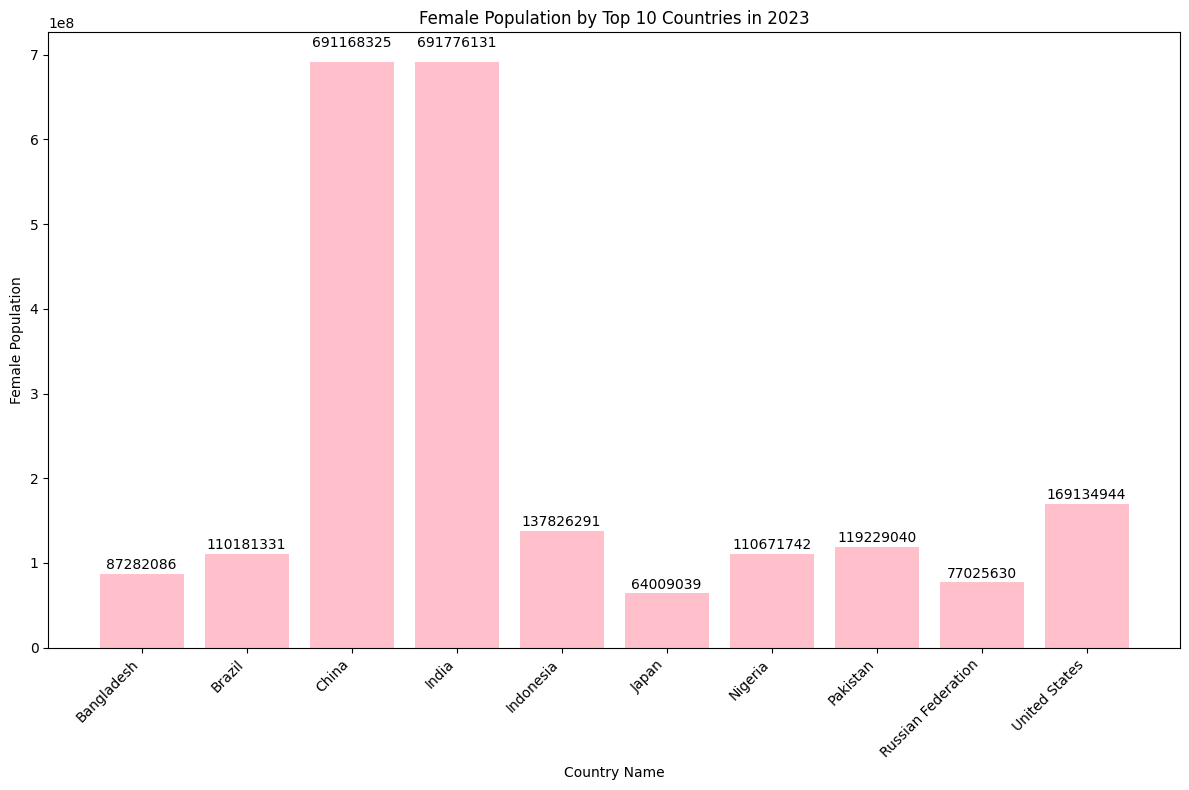

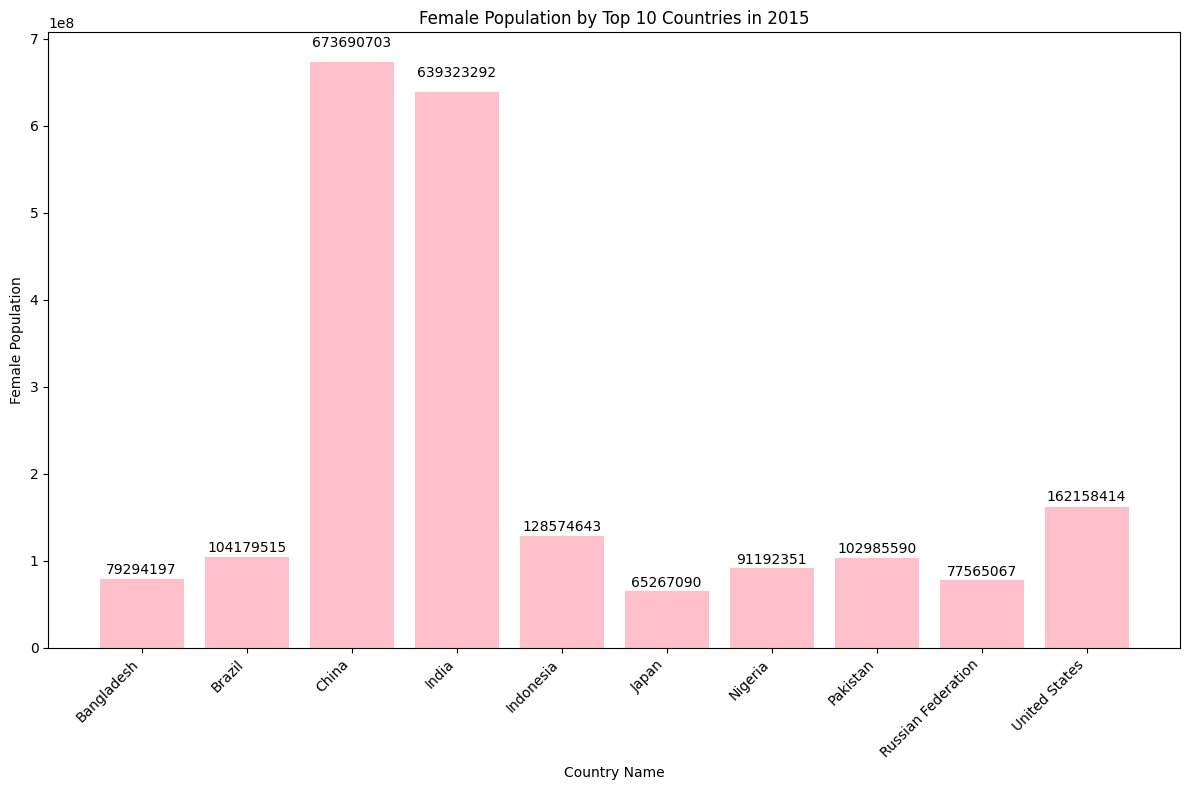

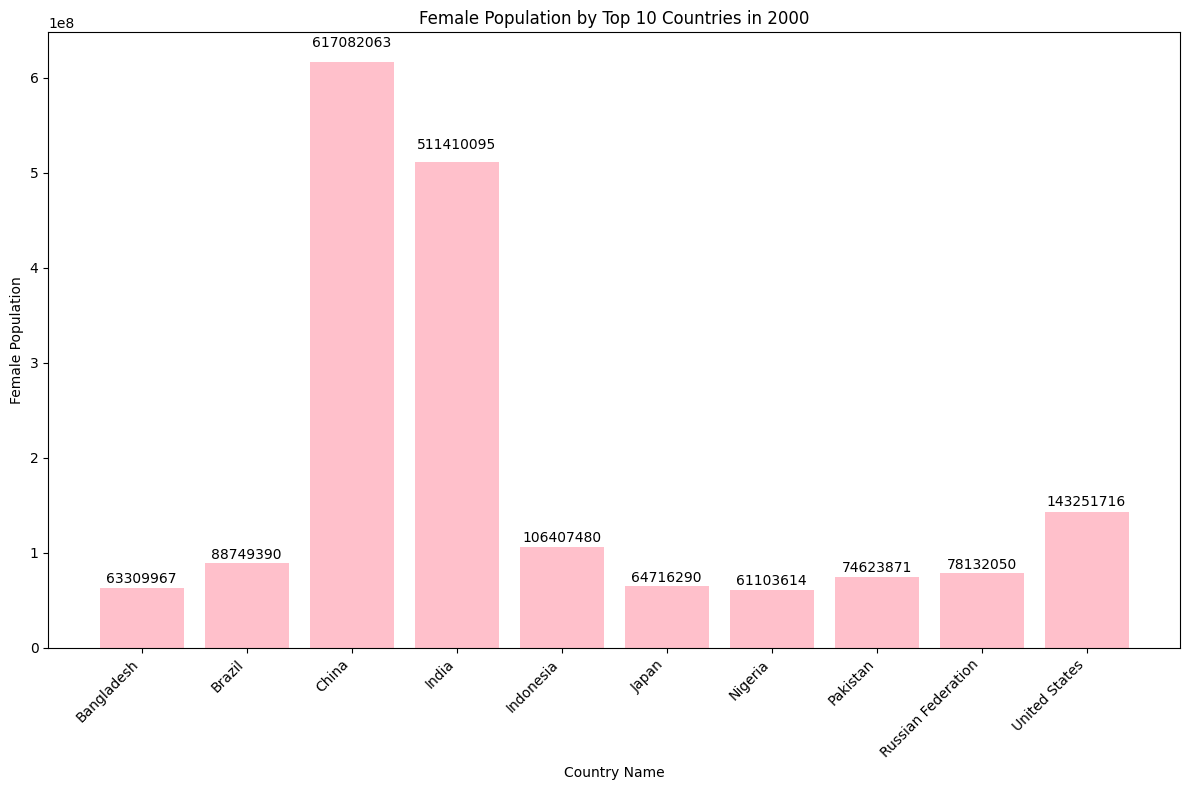

In [19]:
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(female_2023['country_name'], female_2023['female_population'], color='pink')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')


plt.title('Female Population by Top 10 Countries in 2023')
plt.xlabel('Country Name')
plt.ylabel('Female Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


female_2015 = df_female[df_female['year'] == 2015]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(female_2015['country_name'], female_2015['female_population'], color='pink')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')
    
plt.title('Female Population by Top 10 Countries in 2015')
plt.xlabel('Country Name')
plt.ylabel('Female Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Female_2000 = df_female[df_female['year'] == 2000]

# Step 3: Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(Female_2000['country_name'], Female_2000['female_population'], color='pink')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')


plt.title('Female Population by Top 10 Countries in 2000')
plt.xlabel('Country Name')
plt.ylabel('Female Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [20]:
top_10_countries_male = df.groupby('country_name')['male_population'].sum().nlargest(10).index
top_10_countries_male

Index(['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil',
       'Nigeria', 'Bangladesh', 'Russian Federation', 'Japan'],
      dtype='object', name='country_name')

In [21]:
# Filter the DataFrame to include only the top 10 countries
male_df = df[df['country_name'].isin(top_10_countries_male)]

# Filter data for the year 2023
male_2023 = filtered_df[filtered_df['year'] == 2023]

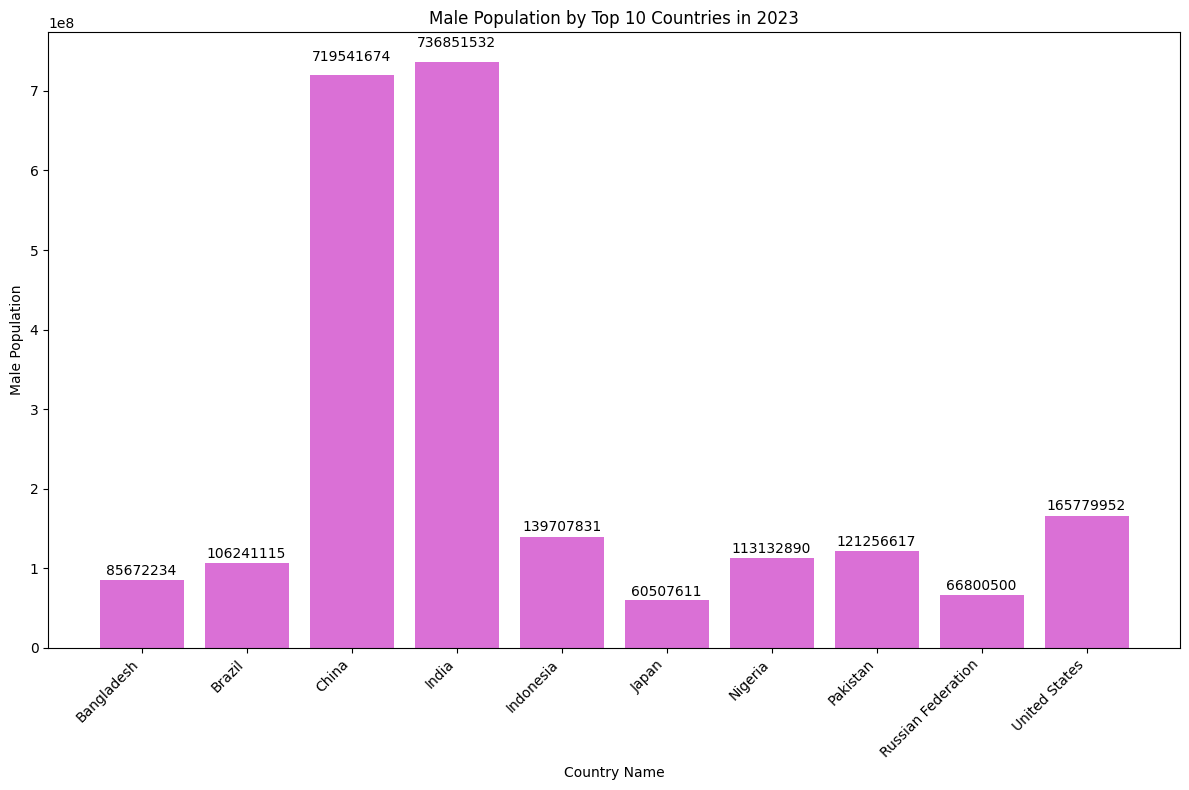

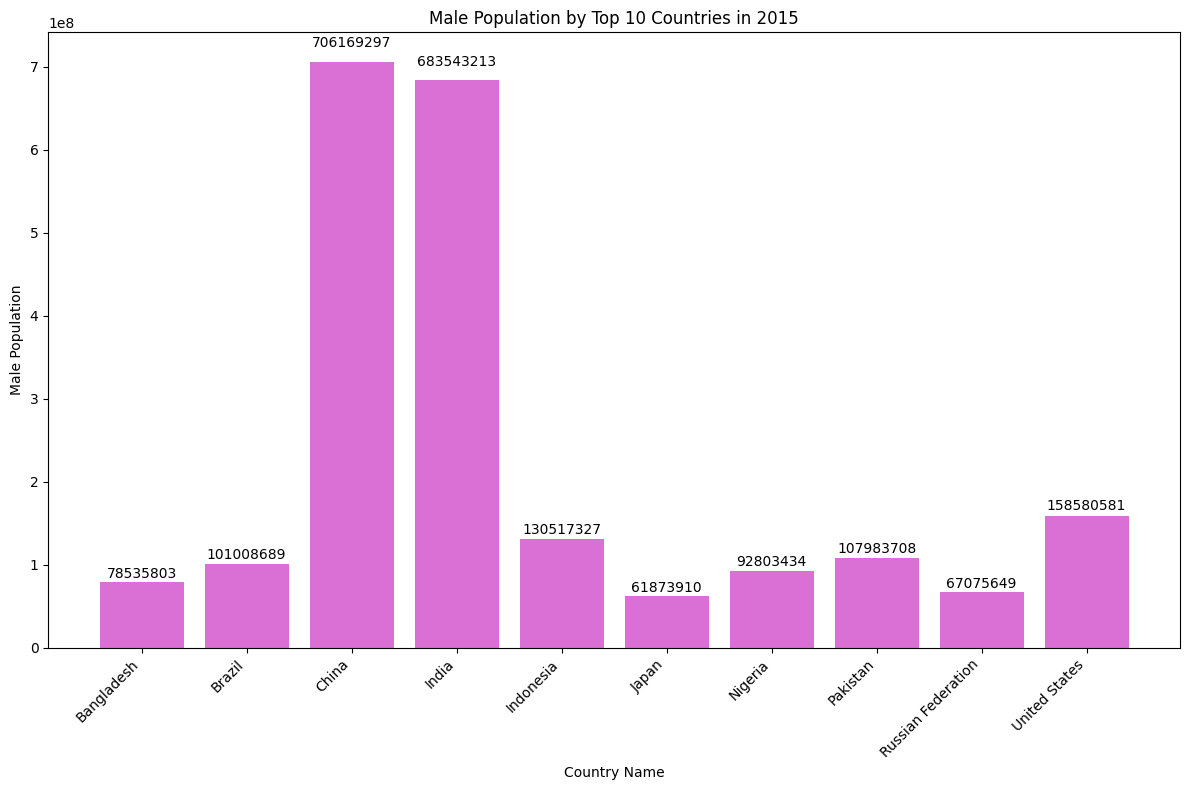

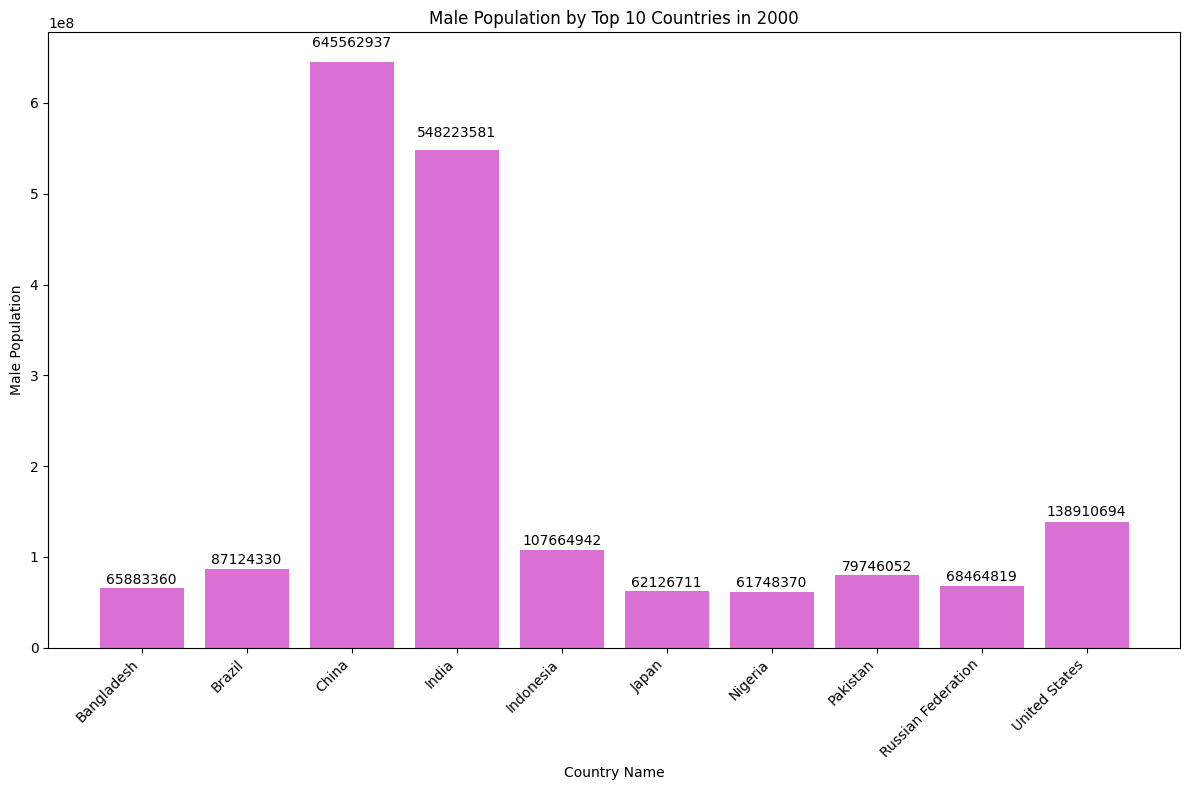

In [22]:
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(male_2023['country_name'], male_2023['male_population'], color='orchid')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')


plt.title('Male Population by Top 10 Countries in 2023')
plt.xlabel('Country Name')
plt.ylabel('Male Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Filter data for the year 2015
male_2015 = filtered_df[filtered_df['year'] == 2015]


plt.figure(figsize=(12, 8))
bars = plt.bar(male_2015['country_name'], male_2015['male_population'], color='orchid')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')


plt.title('Male Population by Top 10 Countries in 2015')
plt.xlabel('Country Name')
plt.ylabel('Male Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Filter data for the year 2000
male_2000 = filtered_df[filtered_df['year'] == 2000]


plt.figure(figsize=(12, 8))
bars = plt.bar(male_2000['country_name'], male_2000['male_population'], color='orchid')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), ha='center', va='bottom')


plt.title('Male Population by Top 10 Countries in 2000')
plt.xlabel('Country Name')
plt.ylabel('Male Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Box Plot

<Axes: >

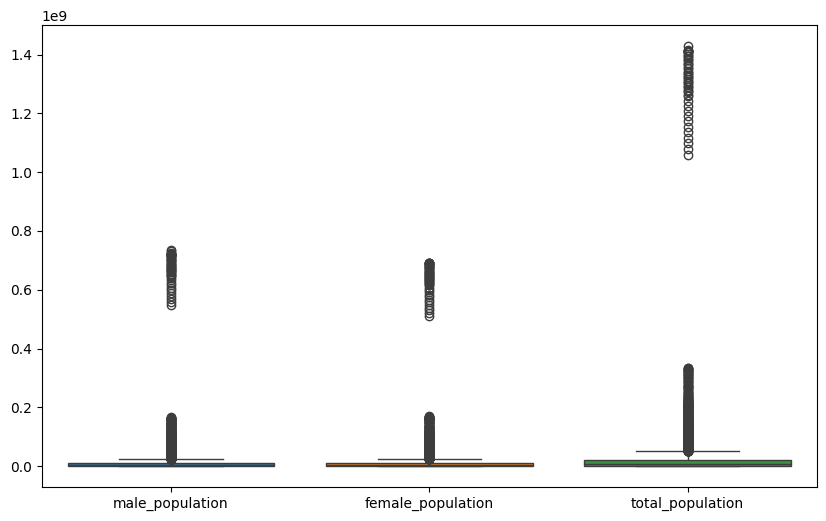

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['male_population', 'female_population', 'total_population']])

In [24]:
def remove_outliers_iqr(df, column):
   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
  
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df_cleaned = remove_outliers_iqr(df, 'male_population')
df_cleaned = remove_outliers_iqr(df_cleaned, 'female_population')
df_cleaned = remove_outliers_iqr(df_cleaned, 'total_population')

In [25]:
df_cleaned

,country_name,country_code,year,female_population,male_population,total_population
0,Afghanistan,AFG,2000,9727541,9815442,19542982
1,Afghanistan,AFG,2001,9793166,9895467,19688632
2,Afghanistan,AFG,2002,10438055,10562202,21000256
3,Afghanistan,AFG,2003,11247647,11397483,22645130
4,Afghanistan,AFG,2004,11690825,11862726,23553551
...,...,...,...,...,...,...
5203,Zimbabwe,ZWE,2019,8122618,7231989,15354608
5204,Zimbabwe,ZWE,2020,8284447,7385220,15669666
5205,Zimbabwe,ZWE,2021,8449834,7543690,15993524
5206,Zimbabwe,ZWE,2022,8614935,7705601,16320537


<Axes: >

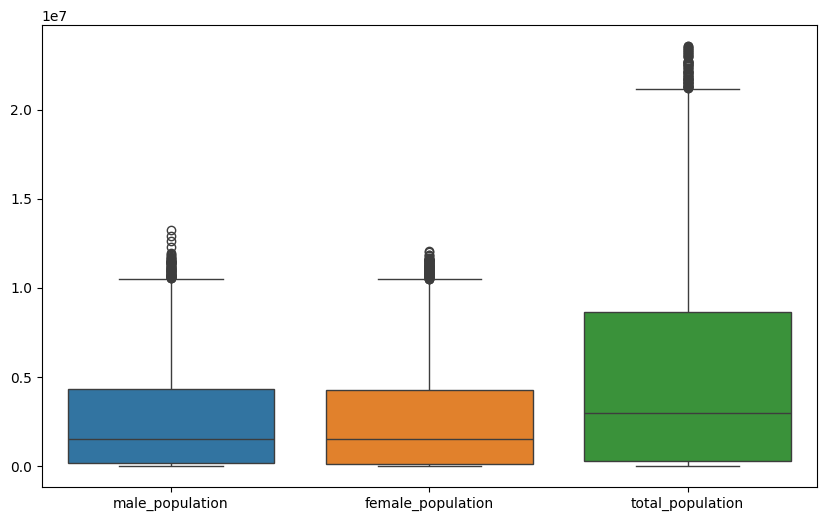

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['male_population', 'female_population', 'total_population']])

# Population Distribution Curve

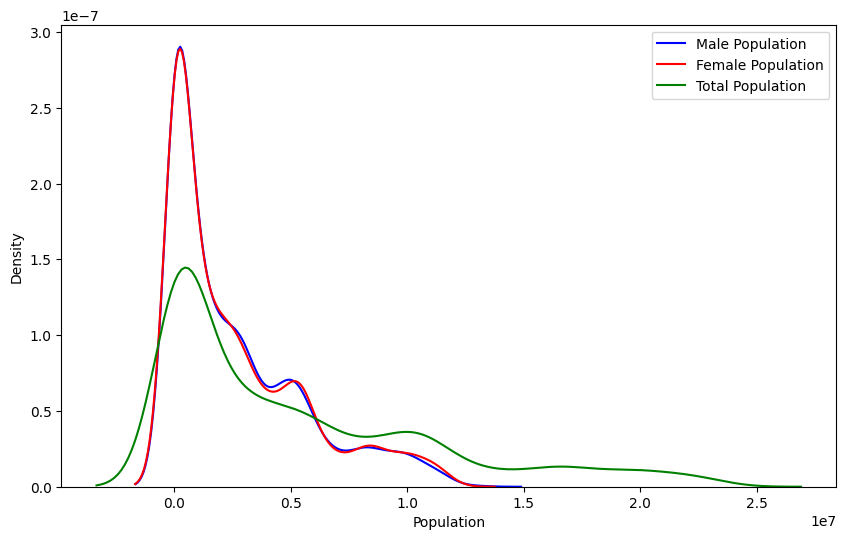

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['male_population'], label='Male Population', color='blue')
sns.kdeplot(df_cleaned['female_population'], label='Female Population', color='red')
sns.kdeplot(df_cleaned['total_population'], label='Total Population', color='green')
plt.xlabel('Population')
plt.legend()